In [1]:
import sys
#sys.path.append(../../)
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
font1 = {'family' : 'Times New Roman' , 'weight' : 'normal','size': 23}
font2 = {'family' : 'Times New Roman' , 'weight' : 'normal','size': 18}

In [2]:
log_path = '../0607_1.log'
with open(log_path, 'r', encoding='utf-8') as f:
    log = f.read().splitlines()

In [3]:
# 分析unit_lstm1, unit_lstm2,Train rmse, Validation rmse, Test rmse之间的关系，尤其是unit_lstm1, unit_lstm2对Test rmse的影响
lstm1 = [int(x.split(' ')[-1]) for x in log if "unit_lstm1: " in x]
lstm2 = [int(x.split(' ')[-1]) for x in log if "unit_lstm2: " in x]

train_rmse1 = [float(x.split(':')[-1]) for x in log if "Train rmse: " in x]
val_rmse = [float(x.split(':')[-1]) for x in log if "Validation rmse: " in x]
test_rmse1 = [float(x.split(':')[-1]) for x in log if "Test rmse: " in x]

In [4]:
lr = []
for x in log:
    if "lr=0.001" in x:
        lr.append(0.001)
    elif "lr=0.01" in x:
        lr.append(0.01)
lr1 = lr[0::2]
lr2 = lr[1::2]
print(lr1==lr2)
lr = np.array(lr1)

True


In [5]:
len(lstm1) == len(lstm2) ==len(train_rmse1) ==len(val_rmse) ==len(test_rmse1)

True

In [6]:
min(test_rmse1)

11.234705924987793

三维散点图和三维曲面图的画法参考https://blog.csdn.net/Eddy_zheng/article/details/48713449

In [7]:
lr

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ,
       0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ])

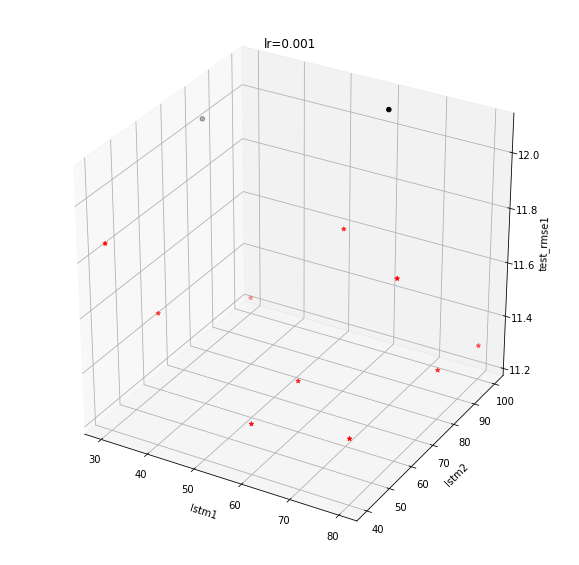

Total sample number:  12


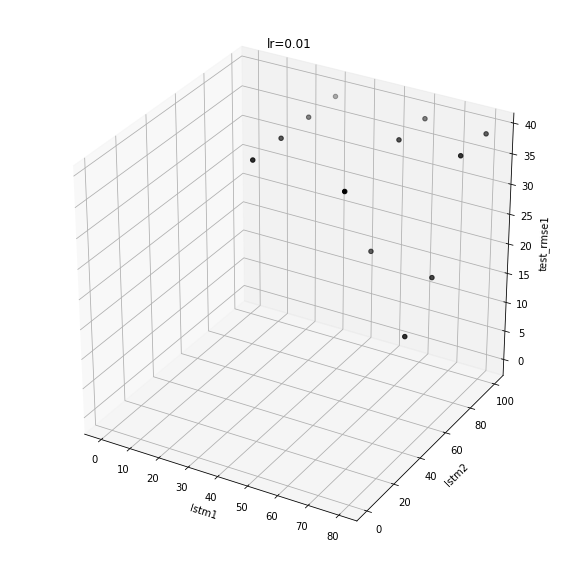

Total sample number:  12


In [11]:
num = 1

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
x, y, z = np.array(lstm1), np.array(lstm2), np.array(test_rmse1)
# 创建一个三维的绘图工程
ax = plt.subplot(111,projection='3d')
# 将数据分成三部分画，颜色有区分
temp = [i and j  for i , j in zip(z<12, lr==0.001)]
ax.scatter(x[temp], y[temp], z[temp], c='red', marker='*')
temp2 = [i and j  for i , j in zip(z>=12, lr==0.001)]
ax.scatter(x[temp2], y[temp2], z[temp2], c='black', marker='o')
ax.set_xlabel('lstm1')
ax.set_ylabel('lstm2')
ax.set_zlabel('test_rmse1')
plt.title('lr=0.001')
plt.show()
print("Total sample number: ", len(x[temp]) + len(x[temp2]))

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
x, y, z = np.array(lstm1), np.array(lstm2), np.array(test_rmse1)
# 创建一个三维的绘图工程
ax = plt.subplot(111,projection='3d')
# 将数据分成三部分画，颜色有区分
temp = [i and j  for i , j in zip(z<12, lr==0.01)]
ax.scatter(x[temp], y[temp], z[temp], c='red', marker='*')
temp2 = [i and j  for i , j in zip(z>=12, lr==0.01)]
ax.scatter(x[temp2], y[temp2], z[temp2], c='black', marker='o')
ax.set_xlabel('lstm1')
ax.set_ylabel('lstm2')
ax.set_zlabel('test_rmse1')
plt.title('lr=0.01')
plt.show()
print("Total sample number: ", len(x[temp]) + len(x[temp2]))

In [12]:
x, y

(array([30, 30, 30, 30, 60, 60, 60, 60, 80, 80, 80, 80, 30, 30, 30, 30, 60,
        60, 60, 60, 80, 80, 80, 80]),
 array([ 40,  60,  80, 100,  40,  60,  80, 100,  40,  60,  80, 100,  40,
         60,  80, 100,  40,  60,  80, 100,  40,  60,  80, 100]))

In [13]:
temp = [i and j  for i , j in zip(z<12, lr==0.001)]
x[temp], y[temp]

(array([30, 30, 30, 60, 60, 60, 80, 80, 80, 80]),
 array([ 40,  60, 100,  40,  60,  80,  40,  60,  80, 100]))

In [23]:
temp = [i and j  for i , j in zip(z<12, lr==0.01)]
x[temp], y[temp]

(array([], dtype=int32), array([], dtype=int32))

In [19]:
temp

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]